In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

data = pd.read_csv('titanic-raw.csv', delimiter = ',')
print(data.shape)
data.head(10)

(1309, 11)


pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   
7       1         0                           Andrews, Mr. Thomas Jr    male   
8       1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9       1         0                          Artagaveytia, Mr. Ramon    male   

    age  sibsp  parch    ticket      fare    cabin embarked  
0  29.0      0      0     24160  211.3375       B5        S  
1   1.0      1      2    113781  151.5500  C22 C26        S  
2   2.0      1      2    113781  151.5500  C22 C26        S  
3  30.0      1      2    113781  151.5500  C22 C26        S  
4  25.0      1      2    113781  151.5500  C22 C26        S  
5  48.0      0      0     19952   26.5500      E12        S  
6  63.0      1      0     13502   77.9583       D7        S  
7  39.0      0      0    112050    0.0000      A36        S  
8  53.0      2      0     11769   51.4792     C101        S  
9  71.0      0      0  PC 17609   49.5042      NaN        C

In [10]:
print("# of passengers in original data:" +str(len(data.index)))

# of passengers in original data:1309


# Analyzing data

In [12]:
sns.countplot(x="survived", data = data)

In [13]:
sns.countplot(x="survived", hue="sex", data = data)

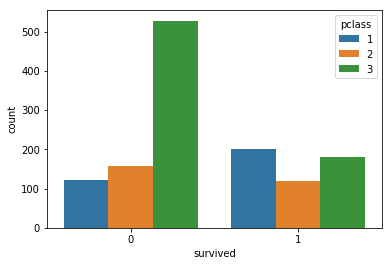

In [14]:
sns.countplot(x="survived", hue="pclass", data = data)

In [16]:
data["age"].plot.hist()

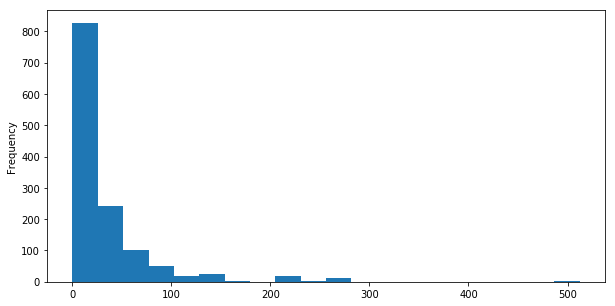

In [19]:
data["fare"].plot.hist(bins=20, figsize=(10,5))

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


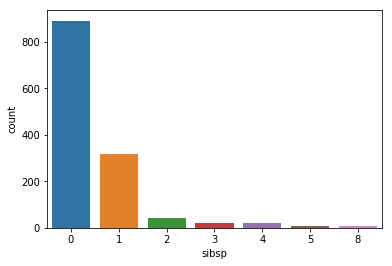

In [21]:
sns.countplot(x="sibsp", data = data)

# Data Wrangling

In [22]:
data.isnull()

pclass  survived   name    sex    age  sibsp  parch  ticket   fare  \
0      False     False  False  False  False  False  False   False  False   
1      False     False  False  False  False  False  False   False  False   
2      False     False  False  False  False  False  False   False  False   
3      False     False  False  False  False  False  False   False  False   
4      False     False  False  False  False  False  False   False  False   
5      False     False  False  False  False  False  False   False  False   
6      False     False  False  False  False  False  False   False  False   
7      False     False  False  False  False  False  False   False  False   
8      False     False  False  False  False  False  False   False  False   
9      False     False  False  False  False  False  False   False  False   
10     False     False  False  False  False  False  False   False  False   
11     False     False  False  False  False  False  False   False  False   
12     False     False  False  False  False  False  False   False  False   
13     False     False  False  False  False  False  False   False  False   
14     False     False  False  False  False  False  False   False  False   
15     False     False  False  False   True  False  False   False  False   
16     False     False  False  False  False  False  False   False  False   
17     False     False  False  False  False  False  False   False  False   
18     False     False  False  False  False  False  False   False  False   
19     False     False  False  False  False  False  False   False  False   
20     False     False  False  False  False  False  False   False  False   
21     False     False  False  False  False  False  False   False  False   
22     False     False  False  False  False  False  False   False  False   
23     False     False  False  False  False  False  False   False  False   
24     False     False  False  False  False  False  False   False  False   
25     False     False  False  False  False  False  False   False  False   
26     False     False  False  False  False  False  False   False  False   
27     False     False  False  False  False  False  False   False  False   
28     False     False  False  False  False  False  False   False  False   
29     False     False  False  False  False  False  False   False  False   
...      ...       ...    ...    ...    ...    ...    ...     ...    ...   
1279   False     False  False  False  False  False  False   False  False   
1280   False     False  False  False  False  False  False   False  False   
1281   False     False  False  False  False  False  False   False  False   
1282   False     False  False  False   True  False  False   False  False   
1283   False     False  False  False   True  False  False   False  False   
1284   False     False  False  False   True  False  False   False  False   
1285   False     False  False  False  False  False  False   False  False   
1286   False     False  False  False  False  False  False   False  False   
1287   False     False  False  False  False  False  False   False  False   
1288   False     False  False  False  False  False  False   False  False   
1289   False     False  False  False  False  False  False   False  False   
1290   False     False  False  False  False  False  False   False  False   
1291   False     False  False  False   True  False  False   False  False   
1292   False     False  False  False   True  False  False   False  False   
1293   False     False  False  False   True  False  False   False  False   
1294   False     False  False  False  False  False  False   False  False   
1295   False     False  False  False  False  False  False   False  False   
1296   False     False  False  False  False  False  False   False  False   
1297   False     False  False  False   True  False  False   False  False   
1298   False     False  False  False  False  False  False   False  False   
1299   False     False  False  False  False  False  Fa

In [23]:
data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

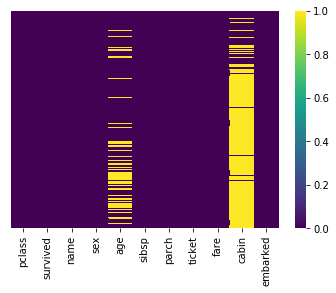

In [27]:
sns.heatmap(data.isnull(), yticklabels = False, cmap="viridis")

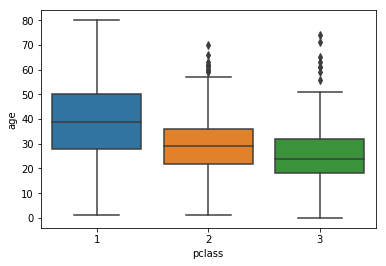

In [30]:
sns.boxplot(x="pclass", y="age", data = data)

In [31]:
data.head(5)

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

    age  sibsp  parch  ticket      fare    cabin embarked  
0  29.0      0      0   24160  211.3375       B5        S  
1   1.0      1      2  113781  151.5500  C22 C26        S  
2   2.0      1      2  113781  151.5500  C22 C26        S  
3  30.0      1      2  113781  151.5500  C22 C26        S  
4  25.0      1      2  113781  151.5500  C22 C26        S

In [34]:
data.drop("cabin", axis=1, inplace = True)

In [35]:
data.head(5)

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

    age  sibsp  parch  ticket      fare embarked  
0  29.0      0      0   24160  211.3375        S  
1   1.0      1      2  113781  151.5500        S  
2   2.0      1      2  113781  151.5500        S  
3  30.0      1      2  113781  151.5500        S  
4  25.0      1      2  113781  151.5500        S

In [36]:
data.dropna(inplace=True)

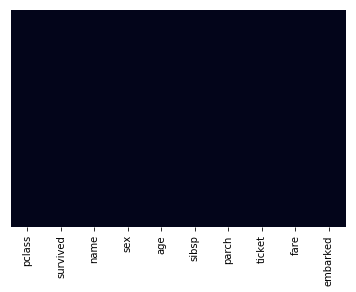

In [37]:
sns.heatmap(data.isnull(), yticklabels = False, cbar=False)

In [38]:
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [39]:
data.head(2)

pclass  survived                            name     sex   age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.0      0   
1       1         1  Allison, Master. Hudson Trevor    male   1.0      1   

   parch  ticket      fare embarked  
0      0   24160  211.3375        S  
1      2  113781  151.5500        S

In [43]:
sex = pd.get_dummies(data['sex'],drop_first=True)
sex.head(5)

male
0     0
1     1
2     0
3     1
4     0

In [45]:
embark=pd.get_dummies(data['embarked'], drop_first=True)
embark.head(5)

Q  S
0  0  1
1  0  1
2  0  1
3  0  1
4  0  1

In [47]:
pcl=pd.get_dummies(data['pclass'], drop_first=True)
pcl.head(5)

2  3
0  0  0
1  0  0
2  0  0
3  0  0
4  0  0

In [49]:
data = pd.concat([data, sex, embark,pcl], axis =1)

In [50]:
data.head(5)

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

    age  sibsp  parch  ticket      fare embarked  male  Q  S  2  3  
0  29.0      0      0   24160  211.3375        S     0  0  1  0  0  
1   1.0      1      2  113781  151.5500        S     1  0  1  0  0  
2   2.0      1      2  113781  151.5500        S     0  0  1  0  0  
3  30.0      1      2  113781  151.5500        S     1  0  1  0  0  
4  25.0      1      2  113781  151.5500        S     0  0  1  0  0

In [52]:
data.drop(['sex','embarked', 'name', 'ticket'],axis =1, inplace=True)

In [53]:
data.head()

pclass  survived   age  sibsp  parch      fare  male  Q  S  2  3
0       1         1  29.0      0      0  211.3375     0  0  1  0  0
1       1         1   1.0      1      2  151.5500     1  0  1  0  0
2       1         0   2.0      1      2  151.5500     0  0  1  0  0
3       1         0  30.0      1      2  151.5500     1  0  1  0  0
4       1         0  25.0      1      2  151.5500     0  0  1  0  0

In [54]:
data.drop('pclass', axis = 1, inplace = True)

In [55]:
data.head()

survived   age  sibsp  parch      fare  male  Q  S  2  3
0         1  29.0      0      0  211.3375     0  0  1  0  0
1         1   1.0      1      2  151.5500     1  0  1  0  0
2         0   2.0      1      2  151.5500     0  0  1  0  0
3         0  30.0      1      2  151.5500     1  0  1  0  0
4         0  25.0      1      2  151.5500     0  0  1  0  0

# Train Data

In [56]:
X = data.drop("survived", axis=1)
y = data['survived']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel = LogisticRegression()

In [65]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
predictions = logmodel.predict(X_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.79      0.81      0.80       177\n           1       0.75      0.72      0.73       136\n\n   micro avg       0.77      0.77      0.77       313\n   macro avg       0.77      0.77      0.77       313\nweighted avg       0.77      0.77      0.77       313\n'

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test,predictions)

array([[144,  33],
       [ 38,  98]])

In [73]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,predictions)*100

77.31629392971246